In [1]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt

con = duckdb.connect("../data/fred.duckdb")

In [2]:
con.execute("SHOW TABLES").df()

,name
0,facts
1,raw_CPIAUCSL
2,raw_FEDFUNDS
3,raw_GDP
4,raw_PAYEMS


In [3]:
con.execute("""
    CREATE TABLE IF NOT EXISTS facts AS
    WITH cleaned AS (
        SELECT
            series_id,
            CAST(date AS DATE) AS date,
            NULLIF(value, '.') AS value_str
        FROM raw_GDP
        UNION ALL
        SELECT
            series_id,
            CAST(date AS DATE),
            NULLIF(value, '.') AS value_str
        FROM raw_CPIAUCSL
        UNION ALL
        SELECT
            series_id,
            CAST(date AS DATE),
            NULLIF(value, '.') AS value_str
        FROM raw_FEDFUNDS
        UNION ALL
        SELECT
            series_id,
            CAST(date AS DATE),
            NULLIF(value, '.') AS value_str
        FROM raw_PAYEMS
    )
    SELECT
        series_id,
        date,
        CAST(value_str AS DOUBLE) AS value
    FROM cleaned
""")


In [4]:
con.execute("SELECT COUNT(*) FROM facts").df()


,count_star()
0,3161


In [5]:
con.execute("SELECT * FROM facts LIMIT 20").df()


,series_id,date,value
0,GDP,1946-01-01,NaN
1,GDP,1946-04-01,NaN
2,GDP,1946-07-01,NaN
3,GDP,1946-10-01,NaN
4,GDP,1947-01-01,243.164
5,GDP,1947-04-01,245.968
6,GDP,1947-07-01,249.585
7,GDP,1947-10-01,259.745
8,GDP,1948-01-01,265.742
9,GDP,1948-04-01,272.567


In [6]:
df = con.execute("""
    SELECT *
    FROM facts
    ORDER BY date
""").df()

df.head()


,series_id,date,value
0,PAYEMS,1939-01-01,29923.0
1,PAYEMS,1939-02-01,30100.0
2,PAYEMS,1939-03-01,30280.0
3,PAYEMS,1939-04-01,30094.0
4,PAYEMS,1939-05-01,30299.0


In [7]:
gdp = df[df.series_id == 'GDP']
gdp.head()

,series_id,date,value
84,GDP,1946-01-01,NaN
88,GDP,1946-04-01,NaN
92,GDP,1946-07-01,NaN
96,GDP,1946-10-01,NaN
100,GDP,1947-01-01,243.164


In [8]:
gdp.head(20)

,series_id,date,value
84,GDP,1946-01-01,NaN
88,GDP,1946-04-01,NaN
92,GDP,1946-07-01,NaN
96,GDP,1946-10-01,NaN
100,GDP,1947-01-01,243.164
107,GDP,1947-04-01,245.968
114,GDP,1947-07-01,249.585
121,GDP,1947-10-01,259.745
128,GDP,1948-01-01,265.742
135,GDP,1948-04-01,272.567


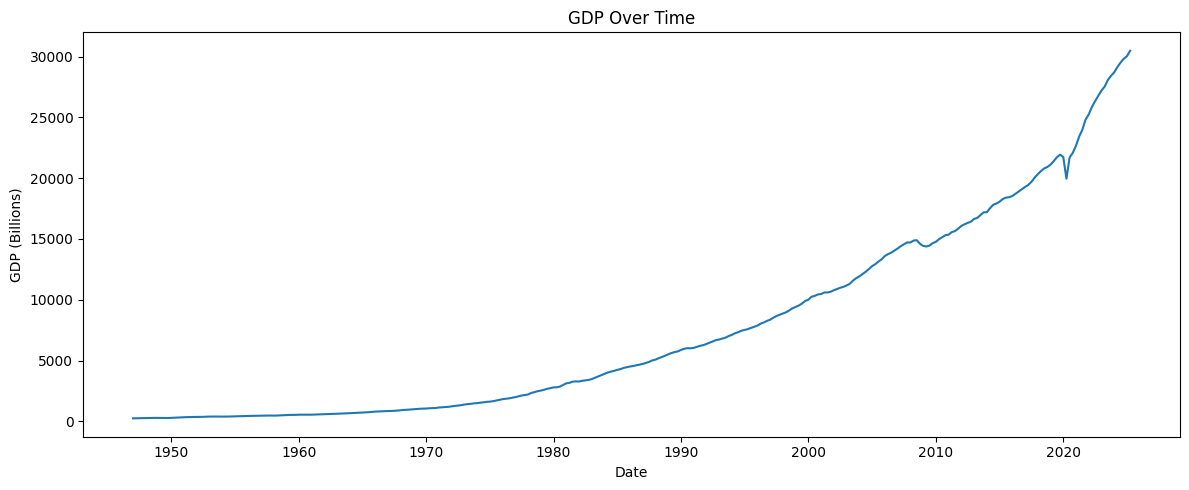

In [9]:
plt.figure(figsize=(12,5))
plt.plot(gdp['date'], gdp['value'])
plt.title('GDP Over Time')
plt.xlabel('Date')
plt.ylabel('GDP (Billions)')
plt.tight_layout()
plt.show()

In [10]:
def plot_series(series_id):
    q = """
        SELECT date, value
        FROM facts
        WHERE series_id = ?
        ORDER BY date
    """
    df = con.execute(q, [series_id]).df()
    
    plt.figure(figsize=(12,5))
    plt.plot(df["date"], df["value"])
    plt.title(series_id)
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.tight_layout()
    plt.show()


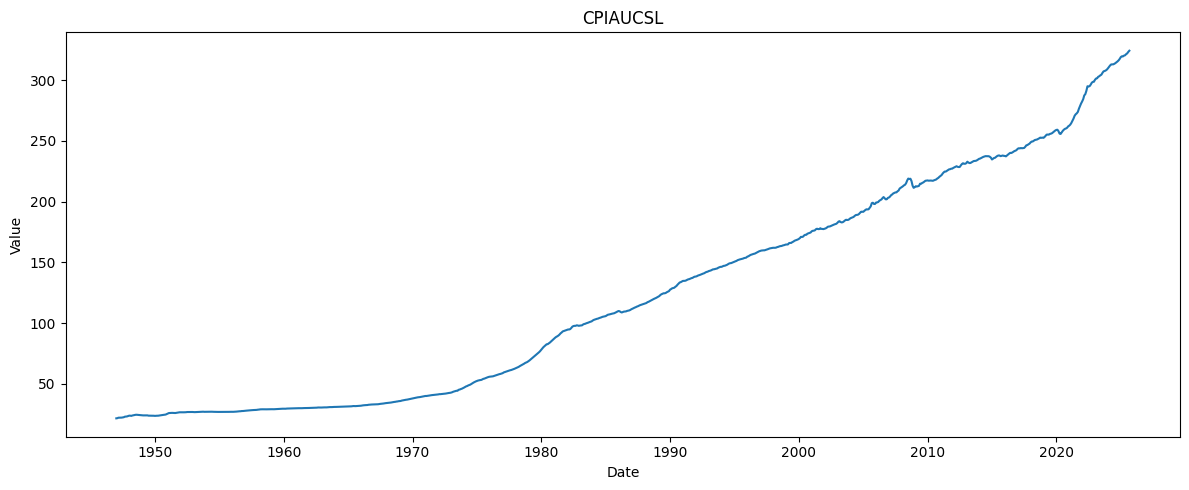

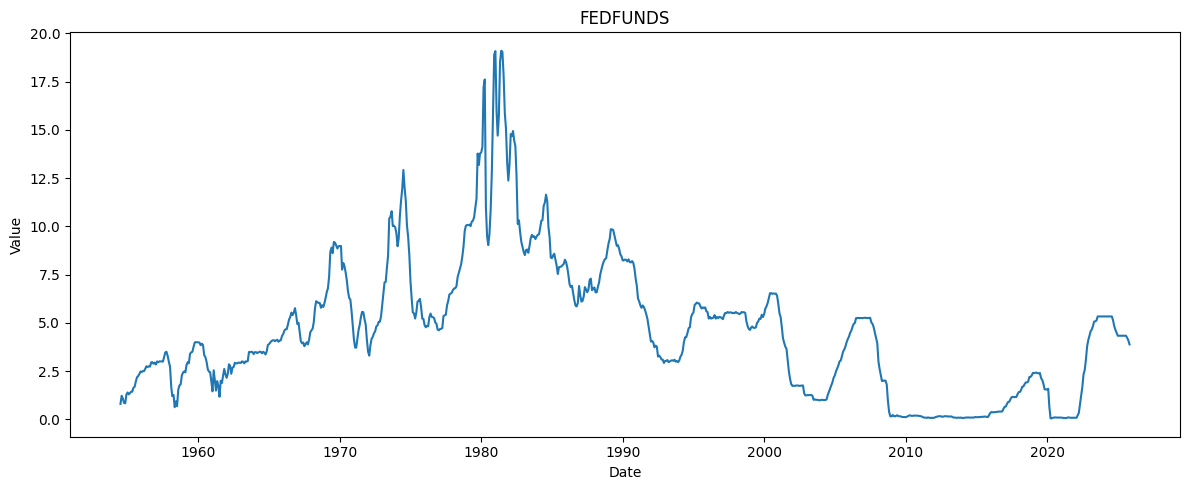

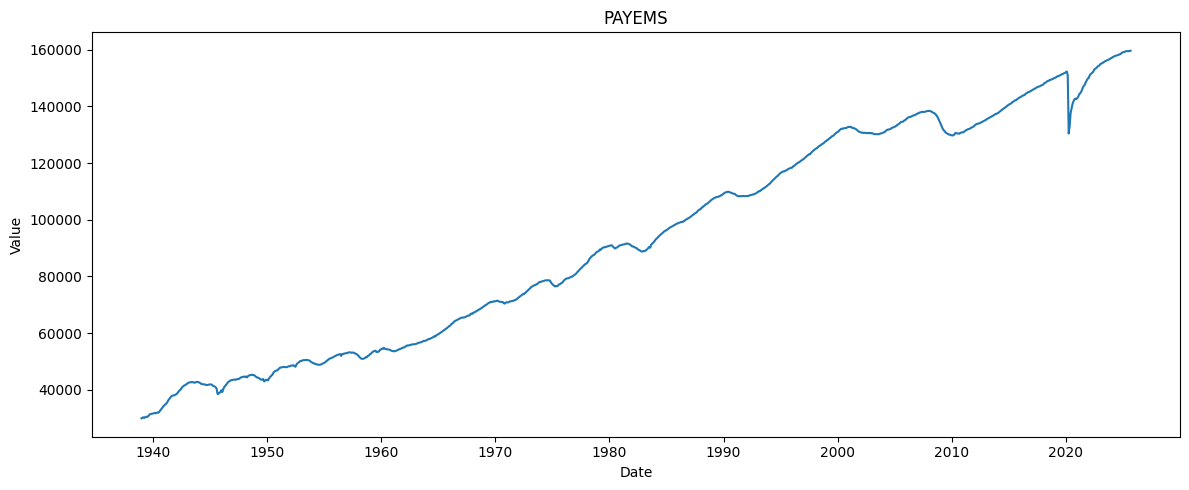

In [11]:
plot_series("CPIAUCSL")
plot_series("FEDFUNDS")
plot_series("PAYEMS")


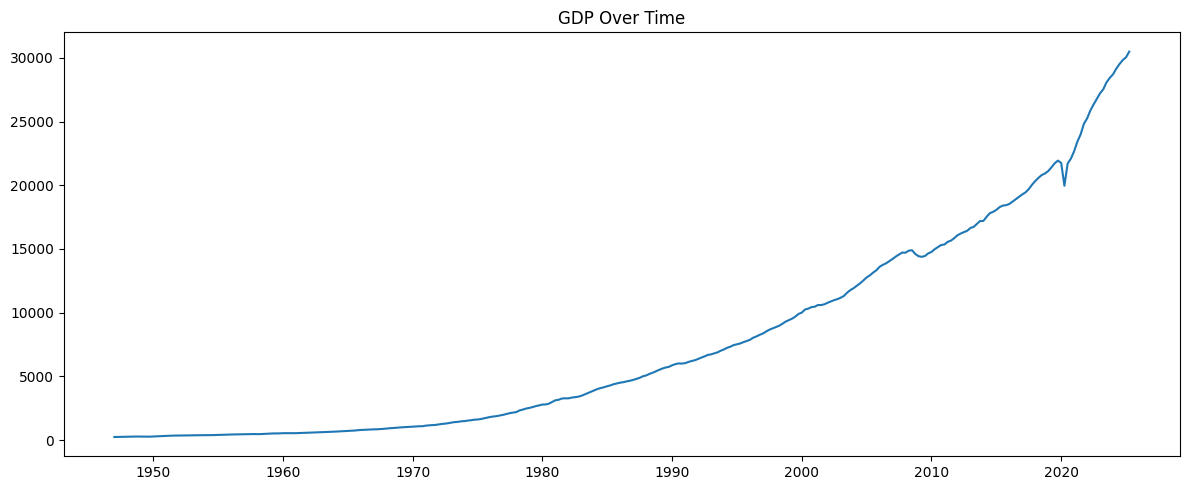

In [12]:
plt.figure(figsize=(12,5))
plt.plot(gdp["date"], gdp["value"])
plt.title("GDP Over Time")
plt.tight_layout()
plt.savefig("../exports/gdp.png")


In [13]:
clean = con.execute("SELECT * FROM facts ORDER BY series_id, date").df()
clean.to_csv("../exports/facts.csv", index=False)